# Project overview 

* This project is about analyzing educational-related data


* We will compare countries accross indicators over time with adapted visualizations to find insights


* Finally we will define a score to rank countries on a subset of indicators


## Exploring data

In [1]:
import pandas as pd

# Import data
data_path = "Data/EdStatsData.csv"
data = pd.read_csv(data_path)

indicator_data_path = "Data/EdStatsSeries.csv"
indicator_data = pd.read_csv(indicator_data_path)


### Shape

In [2]:
# Nombre de colonnes et lignes du fichier
print('The file has',len(data.index) ,'lines and',len(data.columns), 'columns')

The file has 886930 lines and 70 columns


In [3]:
# Visualisation des premières lignes
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


### Duplicates
This dataset seems to contain information on different countries/regions, through the evolution of the value of several World Bank indicators over a period from 1970 to projections to 2100.

We assume that one line corresponds to a single country/indicator pair. 

In [48]:
# Control of the key
print('Data has ' + str(sum(data.duplicated(subset = ['Country Name', 'Indicator Name']))) + ' duplicates')

Data has 0 duplicates


### Indicators by topic


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
                                                                             
#### Function that takes the data & education topic labels as input
### returns a pie chart with the importance of each topic among the data

def topic_plot(data, topics):
    
    ### Groups as 'Others' the topic value of all observations whom topic value is not in topics input
    
    data.loc[~data['Topic'].isin(topics),'Topic'] = 'Others'
    
    ### Computes occurrence of each topic as percentage of whole data 
    grouped_data = data.groupby('Topic').count().loc[:,data.columns[0]]/len(data)
    
    ### Plotting
    fig = plt.figure(figsize = (16,9), facecolor='whitesmoke', edgecolor='k')
    ax = fig.add_subplot(111)
    palette = sns.color_palette(palette = "Paired", n_colors = len(grouped_data))
    ax.pie(grouped_data, autopct = '%1.0f%%', textprops={'fontsize': 15})
    ax.set_aspect('equal')
    patches, text = ax.pie(grouped_data, 
                            colors = palette, textprops={'fontsize': 10})
    ax.legend(patches, grouped_data.index, loc = 'upper left', fontsize = 15)
    ax.set_title('Topics', fontsize = 40, weight = 'bold')

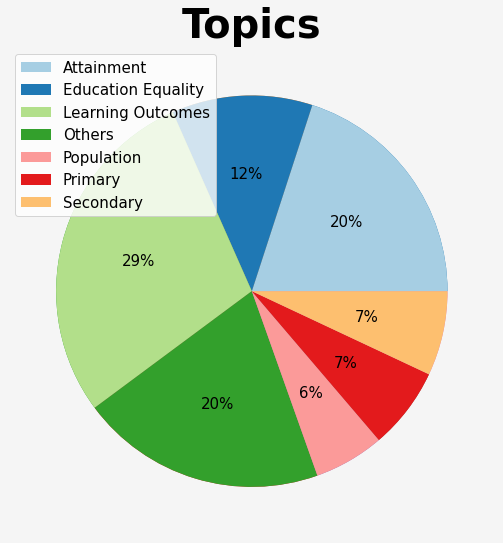

In [7]:
### We chose some topics to plot them
topics = ['Population', 'Primary',                                                                                        
'Secondary',                                                                                       
'Education Equality',                                                                             
'Attainment',                                                                                      
'Learning Outcomes']    

topic_plot(indicator_data, topics)

##  Filters

### Years

* We will conduct a first filter on years

* We will only consider the years between 1990 and 2030 in order to be able to evaluate trends over a substantial period, while limiting ourselves to the closest data.



In [8]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [9]:
# Columns over periods 1970-1989 & 2035-2100 will not serve the purpose of our analysis
droppedColumns = ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69']

data_v2 = data.drop(droppedColumns, axis = 1)
len(data_v2.columns)

35

### Indicators 


We will now make a preliminary selection of indicators.

First, we will define the type of indicators we are looking for. As a reminder, we are an edtech looking to expand internationally. Our structure offers online training content to high school and university audiences. 

We will therefore establish ourselves primarily in countries/regions whose student population has good prospects for 2030. We will have to include demographic indicators that provide information on the age of a population and its access to education over the years.

In order to pay our trainers and instructional designers, we will need to ensure that the student population can afford the cost of our training. We will have to include indicators of wealth. 

Since our training is online, we will need to obtain information on the literacy of the population to ensure that they will be able to complete the modules online. 

We would like to get information on the connectivity of the different countries. To follow an online training requires access to the internet and a personal computer.



 


Having expressed the need, we will now proceed with the selection.
The World Bank website provides a list of indicators by theme. 
It is from this list that we make the following selection.

* Wealth indicators : 
    * Absolute:
        * GDP at market prices (constant 2005 US dollar)
        * GDP, PPP (constant 2011 international dollar)
        
    * Relative : 
         * GDP per capita (constant 2005 US dollar)
         * GDP per capita, PPP (constant 2011 international dollar)
        
        
        
* Demographic indicators of access to education : 
    * Relative : 
        * Adjusted net enrolment rate, upper secondary, both sexes (%)
        * Total net enrolment rate, upper secondary, both sexes (%)
        * Gross enrolment ratio, upper secondary, both sexes (%)
        * Gross enrolment ratio, post-secondary non-tertiary, both sexes (%)
        * Gross enrolment ratio, tertiary, both sexes (%)  
    * Absolute : 
         * School age population, upper secondary education, both sexes (number)
         * School age population, tertiary education, both sexes (number)
         * Enrolment in post-secondary non-tertiary education, both sexes (number)
         * Enrolment in tertiary education, all programmes, both sexes (number)
         * Population growth (annual %)
          


* Literacy Indicators :
     * Youth literacy rate, population 15-24 years, both sexes (%)
     * Adult literacy rate, population 15+ years, both sexes (%)

* Connectivity Indicators :
     * Internet users (per 100 people)
     * Personal computers (per 100 people)



                            


          
 
           



                         

In [10]:
### Selected indicators

indicators = ['GDP at market prices (constant 2005 US$)',
 'GDP, PPP (constant 2011 international $)',
 'GDP per capita (constant 2005 US$)',
 'GDP per capita, PPP (constant 2011 international $)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Gross enrolment ratio, upper secondary, both sexes (%)',
 'Gross enrolment ratio, tertiary, both sexes (%)',
 'Enrolment in post-secondary non-tertiary education, both sexes (number)',
 'Enrolment in tertiary education, all programmes, both sexes (number)',
 'Population growth (annual %)',
 'Youth literacy rate, population 15-24 years, both sexes (%)',
 'Adult literacy rate, population 15+ years, both sexes (%)',
 'Internet users (per 100 people)',
 'Personal computers (per 100 people)']

# Filtering data to keep selected indicators

data_v3 = data_v2[data_v2['Indicator Name'].isin(indicators)]
print(data_v3.shape)
print('Table has now', len(data_v3), 'lines and', len(data_v3['Indicator Name'].unique()), 'unique indicators')

(3388, 35)
Table has now 3388 lines and 14 unique indicators


In [11]:
data_v3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030
8,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,Arab World,ARB,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,5.459347e+01,5.459347e+01,5.459347e+01,5.459347e+01,5.459347e+01,6.600607e+01,...,7.736459e+01,7.736459e+01,7.736459e+01,7.736459e+01,NaN,NaN,NaN,NaN,NaN,NaN
1171,Arab World,ARB,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,NaN,NaN,NaN,NaN,NaN,NaN,...,2.202545e+05,2.058710e+05,3.115771e+05,3.293756e+05,NaN,NaN,NaN,NaN,NaN,NaN
1204,Arab World,ARB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,2.406850e+06,2.391953e+06,2.568057e+06,2.817956e+06,3.019343e+06,3.294608e+06,...,8.594488e+06,9.147083e+06,9.688632e+06,9.966484e+06,NaN,NaN,NaN,NaN,NaN,NaN
1242,Arab World,ARB,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,6.391230e+11,6.480504e+11,6.788319e+11,7.033636e+11,7.282296e+11,7.480811e+11,...,1.566083e+12,1.663124e+12,1.718874e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Missing value analysis

We will now perform a table fill rate analysis for each of the indicators in order to refine our selection.

In [12]:
### Function that takes the data as input - returns heatmap with percentage of NAn values for each indicator
def missing_val_heatmap(data):
    

    data = data.copy()
    data.set_index('Indicator Name', inplace = True)

    ### Columns to drop so we do not plot them in the heatmap

    non_year_columns = ['Country Name', 'Country Code', 'Indicator Code']
    data = data.drop(non_year_columns, axis = 1)
    
    ### Get data with percentage of missing values for each indicator
    grouped_data = data.isnull().groupby(data.index).mean()
    
    
    ### Plotting heatmap
    fig = plt.figure(figsize = (12,9))
    g = fig.add_subplot(111)
    g = sns.heatmap(grouped_data, cbar= None, cmap= "Greys", linewidths= 0.3)
    g.set_yticks(g.get_yticks())
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize = 16, weight = 'bold')
    plt.xticks(rotation=90)
    g.set_title('Missing values ratio per indicator', fontsize = 30, weight = 'bold', pad = 16)
    g.set_xticks(g.get_xticks())
    g.set_xticklabels(g.get_xticklabels(), fontsize = 16, rotation = 90)

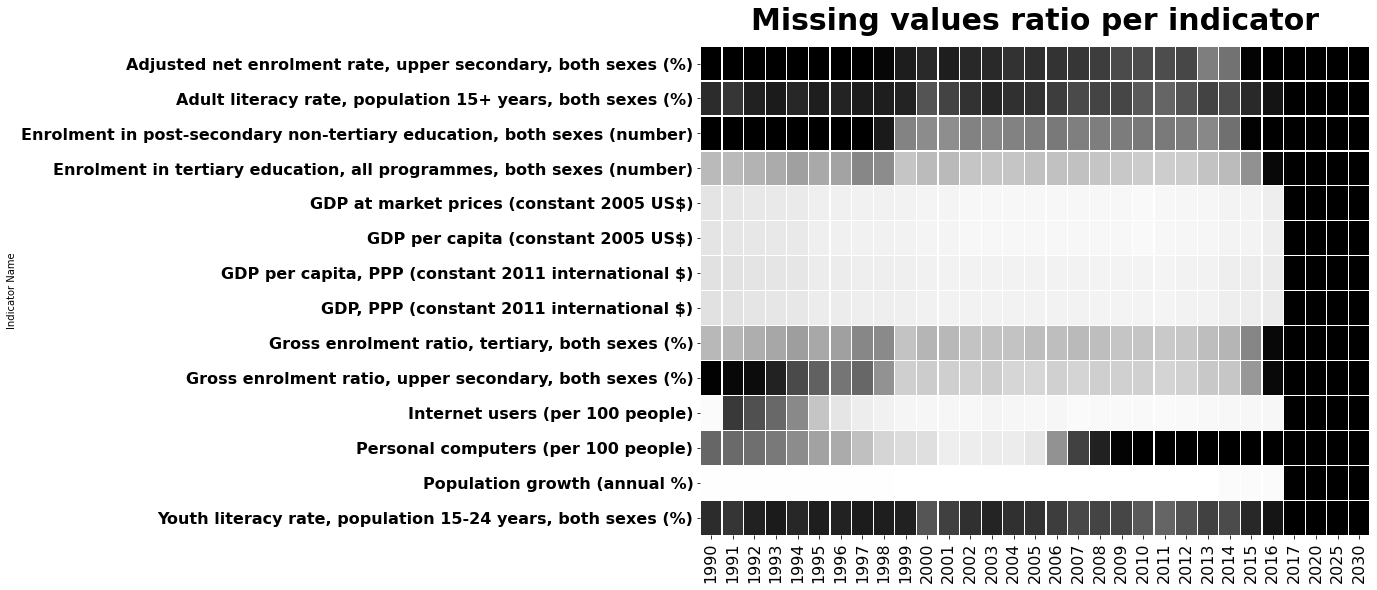

In [13]:
missing_val_heatmap(data_v3)

* The period 2017-2030 contains practically only missing data for all the indicators

* We also note that some indicators seem to be better informed than others, notably indicators related to GDP

* On the contrary, some indicators seem to be lacking in terms of data in any given year: literacy indicators, and some indicators related to secondary and tertiary school enrolment rates 


* We will compare the fill rate with a bar chart.     


In [14]:
### Function that takes data as input
### returns hierarchical bar chart with Nans values per indicator

def bar_chart(data):

    data = data.copy()
    data.set_index('Indicator Name', inplace = True)

    ### Columns to drop so we do not plot them in the heatmap
    non_year_columns = ['Country Name', 'Country Code', 'Indicator Code']
    data = data.drop(non_year_columns, axis = 1)
    
    ### Get data with percentage of missing values for each indicator accross years
    grouped_data = data.isnull().groupby(data.index).mean()
    
    ### Compute the average NANs values percentage accross years 
    grouped_data = grouped_data.mean(axis = 1)
    
    
    ### Plotting
    fig = plt.figure(figsize = (16,9), facecolor = 'w')
    ax = fig.add_subplot(111)
    ax.barh(y = np.linspace(0,1, len(grouped_data)), width = sorted(grouped_data)[::-1], 
        height = 0.05)
    
    ### Sort labels
    labels, _ = zip(*sorted(zip(grouped_data.index, grouped_data), 
                key = lambda k : k[1])[::-1])
    
    ax.set_yticks(np.linspace(0,1, len(grouped_data)))
    ax.set_yticklabels(labels, fontsize = 12)
    ax.set_title('Null values mean accross years per indicator', fontsize = 20)


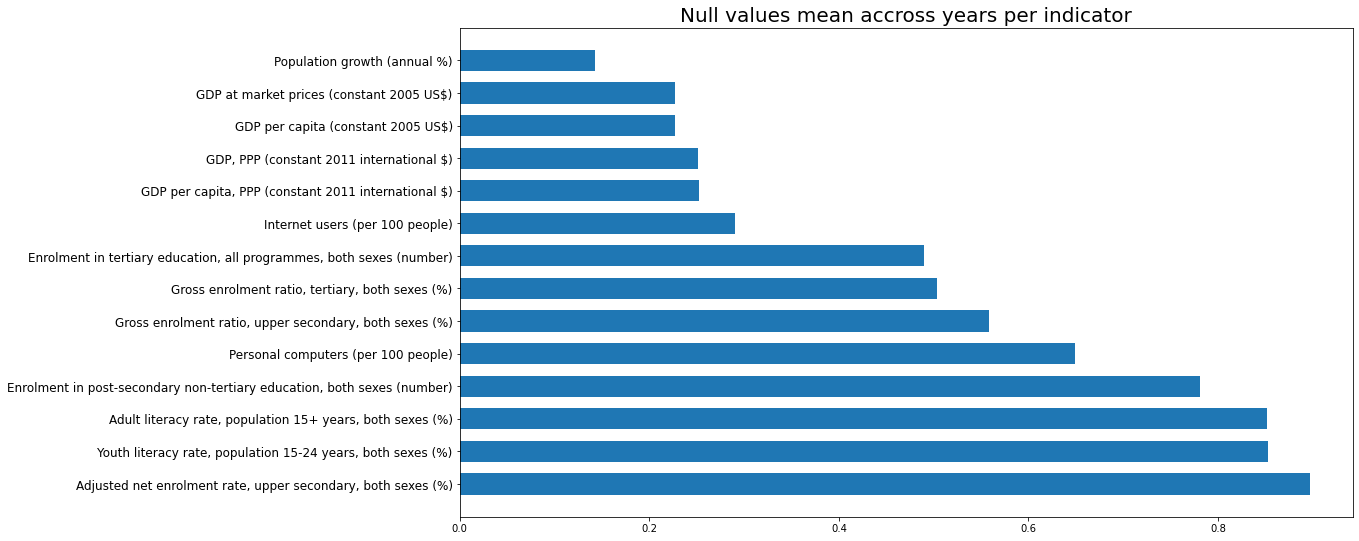

In [15]:
bar_chart(data_v3)

* The graph above confirms our observations and allows us to quantify them

* Five indicators have a fill rate less than or equal to about 35% (on average only 35% of the countries/regions have a value filled in each year)

* The most common economic and demographic indicators are also those with the best fill rate (GDP and population growth). 

* Before making a selection on these averages, we will refine the analysis by calculating the fill rate by year groups. Here, we consider that a group is defined by a decade.



* Will be kept to pursue the analysis :
    * GDP and population growth, which are well fulfilled
    * Internet access is also well informed
    * Finally, even if they have about 50% missing values, the indicators of enrolment rates in upper secondary and university (tertiary) education can be retained in the rest of the analysis.


* Among all the indicators measuring GDP, we will select : 
    * 'GDP at market prices'
    * 'GDP per capita' calculated on the oldest basis, in constant 2005 dollars. 


* Will be discarded: 
    * The indicator that measures the rate of access to a personal computer has an uneven fill. It was correctly filled before 2010 and much less so since then. It will be excluded from the analysis.
    * All other indicators are far too sparse over the periods concerned and will be discarded in the rest of this analysis. 





In [49]:
# Filtering on kept indicators

selected_indicators = ['GDP at market prices (constant 2005 US$)', 
                   'GDP per capita (constant 2005 US$)', 
                   'Gross enrolment ratio, tertiary, both sexes (%)',
                   'Gross enrolment ratio, upper secondary, both sexes (%)', 
                   'Internet users (per 100 people)', 'Population growth (annual %)']

data_v4 = data_v3[data_v3['Indicator Name'].isin(selected_indicators)]

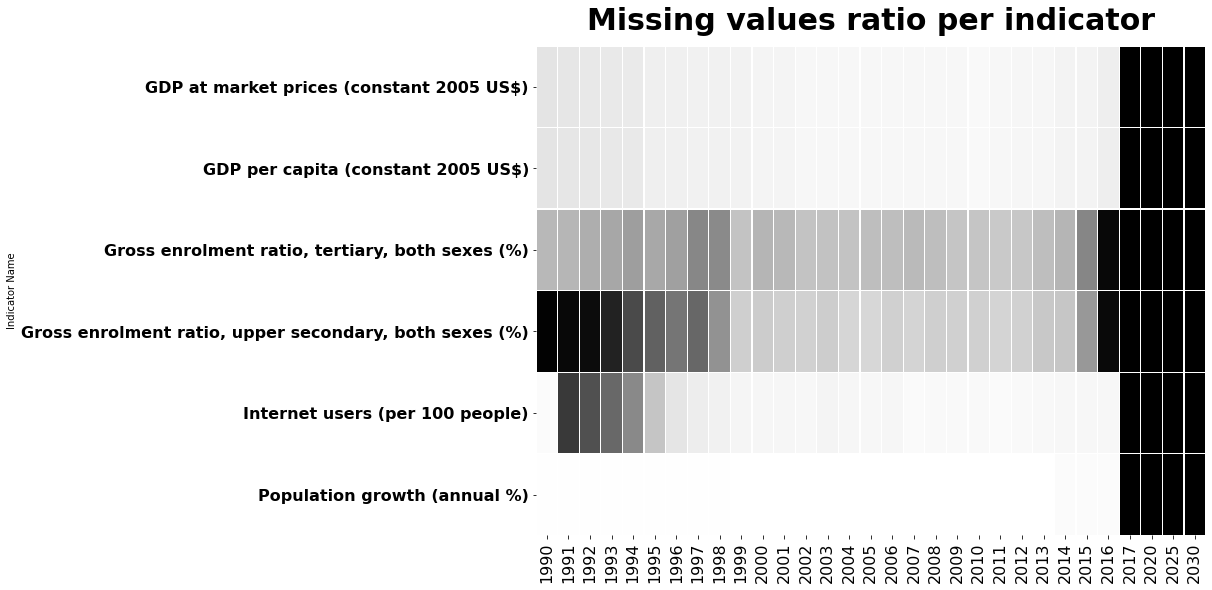

In [17]:
missing_val_heatmap(data_v4)

In [18]:
# Dropping columns with too many missing values

columns_to_be_dropped = ['1990', '1991', '1992', '1993', '2016', '2017', '2020', '2025', '2030']
data_v5 = data_v4.drop(columns_to_be_dropped, axis = 1)

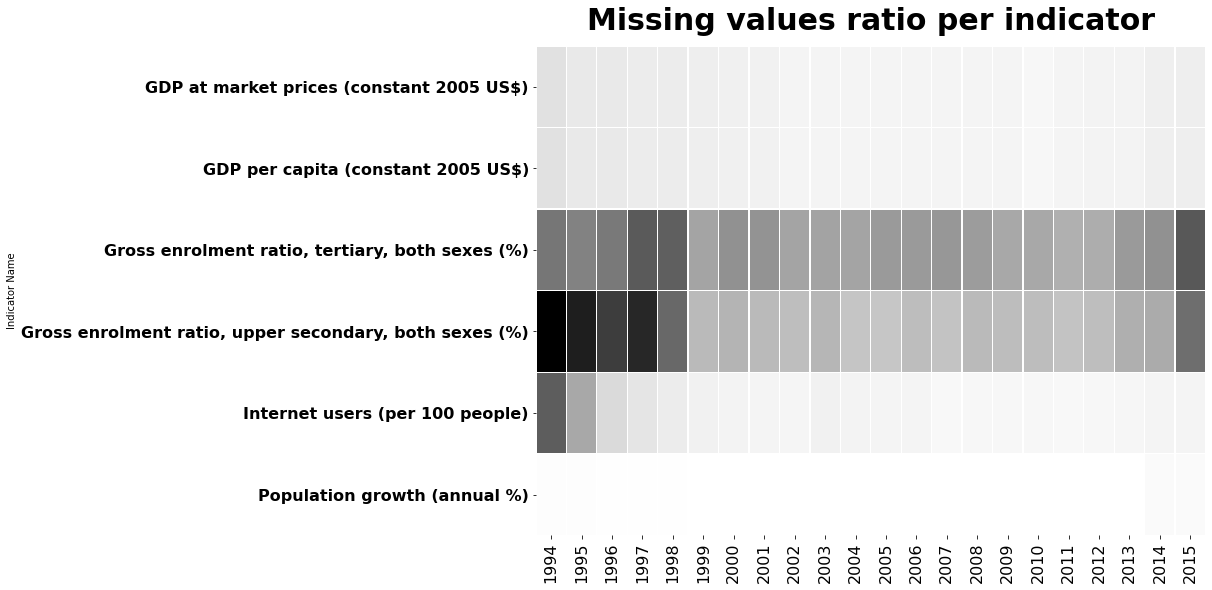

In [19]:
# Graphique de remplissage
missing_val_heatmap(data_v5)

## Indicators: trends

### Distribution

In [20]:
# Plotting function
### Input : data
### Returns one histogram per indicator : mean value on that indicator for each country

def histogram(data):
    
    
    data = data.copy()
        
    indicators = data['Indicator Name'].unique()
      
    ### Isolate year columns that contain indicator values
    years = data.columns[4:]
    
    ### 
    data = pd.melt(data, id_vars = ['Indicator Name', 'Country Name', 'Country Code', 
                'Indicator Code'], 
        value_vars = years, var_name = 'Year', value_name = 'Indicator Value')
    
    data = data.pivot_table(values = 'Indicator Value', 
                           index = 'Country Name', columns = 'Indicator Name',
                aggfunc = 'mean')
    
    fig = plt.figure(figsize = (12,9))
    
    for i, indicator in enumerate(indicators):
        g = fig.add_subplot(3,2,i+1)
        g = sns.histplot(x = indicator, data = data)
        g.set_xlabel('', fontsize = 12)
        g.set_title(indicator, fontsize = 14, pad = 16)
        
        
    fig.tight_layout()
          

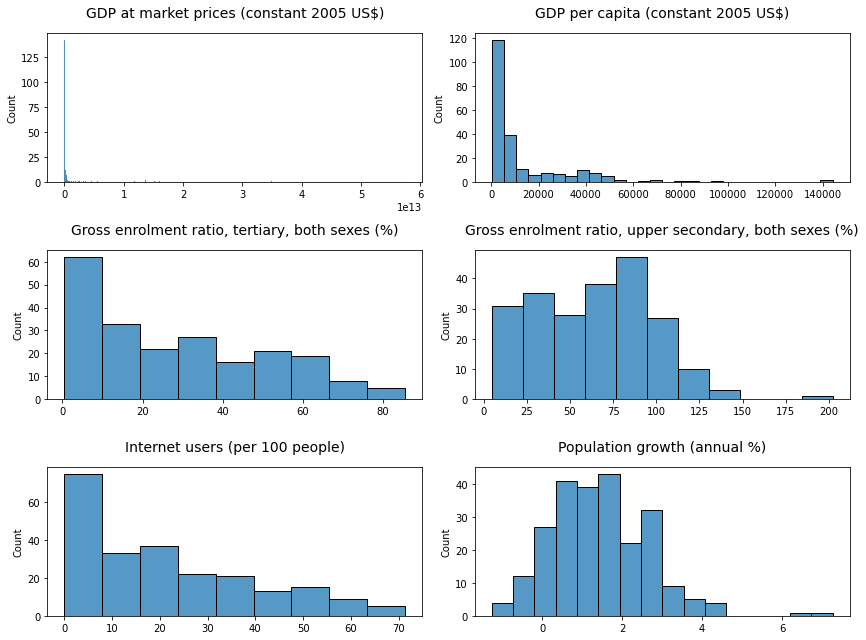

In [21]:
histogram(data_v5)

* The distribution of the GDP indicator shows a great dispersion, being strongly skewed to the right. Some countries have a much higher GDP than most other countries


* The same trend can be observed in the GDP/capita indicator and in the Internet access rate indicator, which was to be expected


### Correlation

In [22]:
def correlation(data):

    data = data.copy()
    
    ### Isolate year columns
    year_cols = data.columns[4:]
    
    
    ### Reduce year columns to one single column named 'Year'
    data = pd.melt(data, id_vars = ['Indicator Name', 'Country Name'],
                  value_vars = year_cols, var_name = 'Year', 
                value_name = 'Indicator Value')
    
    ### Set indicator labels as columns : country/year pairs are rows
    data = data.pivot_table(values = 'Indicator Value', 
                    index = ['Country Name', 'Year'], columns = 'Indicator Name')
    
    
    ### Plotting indicators correlation matrix heatmap
    fig = plt.figure(figsize = (16,9))
    palette = sns.diverging_palette(20, 220, n=256)
    
    g = fig.add_subplot(111)
    g = sns.heatmap(data.corr().round(decimals = 2), 
             vmin = -1, vmax = 1, cmap= palette, 
            annot = True, fmt='2g', annot_kws={"size": 16})
    fig.suptitle('Indicators Pearson correlation coefficient', fontsize = 24)   
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    

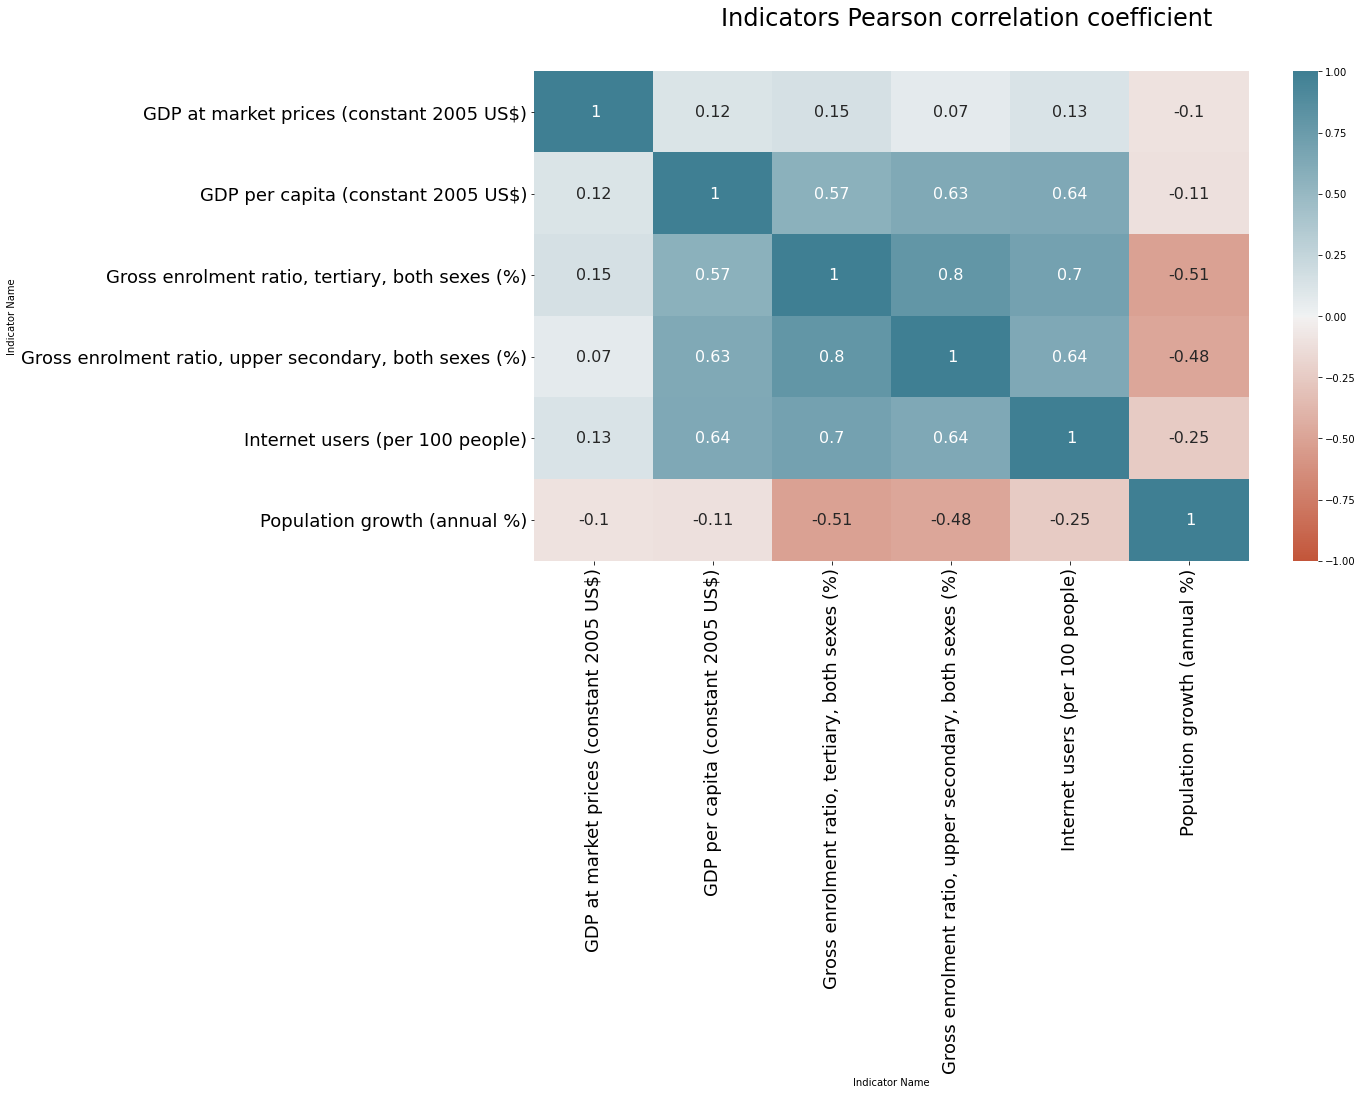

In [23]:
correlation(data_v5)

* The Pearson correlation is very sensitive to outliers in distributions and assumes Gaussian distributions, condition that is not met here


* Therefore the insights given by the correlation matrix should not be interpreted as robust dependencies 



* The correlation matrix shows us that 4 indicators seem to be positively correlated with each other 
    * Upper secondary and university enrolment rates have a correlation coefficient of 0.8, which is very high
    * The 4 indicators that have a positive correlation coefficient are :
        * the Internet access rate, 
        * the high school enrolment rates
        * university enrolment rates
        * and the GDP per capita
        
    * With coefficients close to 0, the GDP indicator is not correlated with the other indicators
    * Finally, the demographic indicator of population growth seems to be negatively correlated (coefficient close to -0.5) with the schooling indicators. Countries with higher school enrollment tend to have a lower population growth

### Countries/regions comparison over time

We will now visualize the evolution of the value of the indicators for different regions during the selected period. 

In [24]:

### Function that takes the data as input and returns plots with regional trends over the years for each indicator
def region_trends(data):

    
    data = data.copy()
    
    
    ### Define variables : one plot per indicator
    indicators = data['Indicator Name'].unique()
    
    ### year columns that contain indicator values to plot
    years = data.columns[4:]
    
    ### manually identified region labels on 'Country Name' variable
    regions = ['Arab World', 'East Asia & Pacific', 'Europe & Central Asia',
              'European Union', 'Latin America & Caribbean', 'Middle East & North Africa', 'North America',
              'South Asia', 'Sub-Saharan Africa', 'High income', 'Low income',
               'Middle income', 'World', 'OECD members']


    data.set_index(['Indicator Name', 'Country Name'], inplace = True)
    
    
    ### Plotting
    
    fig = plt.figure(figsize = (16,16))
    palette = sns.color_palette(palette = "Paired", n_colors = len(regions))

    for i, indicator in enumerate(indicators):
        
        ax = fig.add_subplot(3,2,i+1)
        
        ### we will keep mean value on indicator for each country to sort the legend on each plot
        region_mean_value = []
        
        for j, region in enumerate(regions):
            ax.plot(data.loc[(indicator, region), years],  
                     linestyle = 'solid', 
                     marker = 's', markersize = 5, linewidth = 5, color = palette[j], 
                    label = region)

            ax.set_title(indicator, fontdict={'fontsize': 20, 'fontweight': 'medium'})
            ax.xaxis.set_tick_params(labelsize=10, rotation = 90)
            ax.yaxis.set_tick_params(labelsize=10)
            region_mean_value.append(data.loc[(indicator, region), years].mean())
            
        handles, labels = ax.get_legend_handles_labels()
        handles, labels, _ = zip(*sorted(zip(handles, labels, 
                                        region_mean_value),
                            key = lambda k : k[2], reverse = True))
        
        ax.legend(handles, labels, loc = 'upper left', fontsize = 7)
    
    fig.tight_layout()



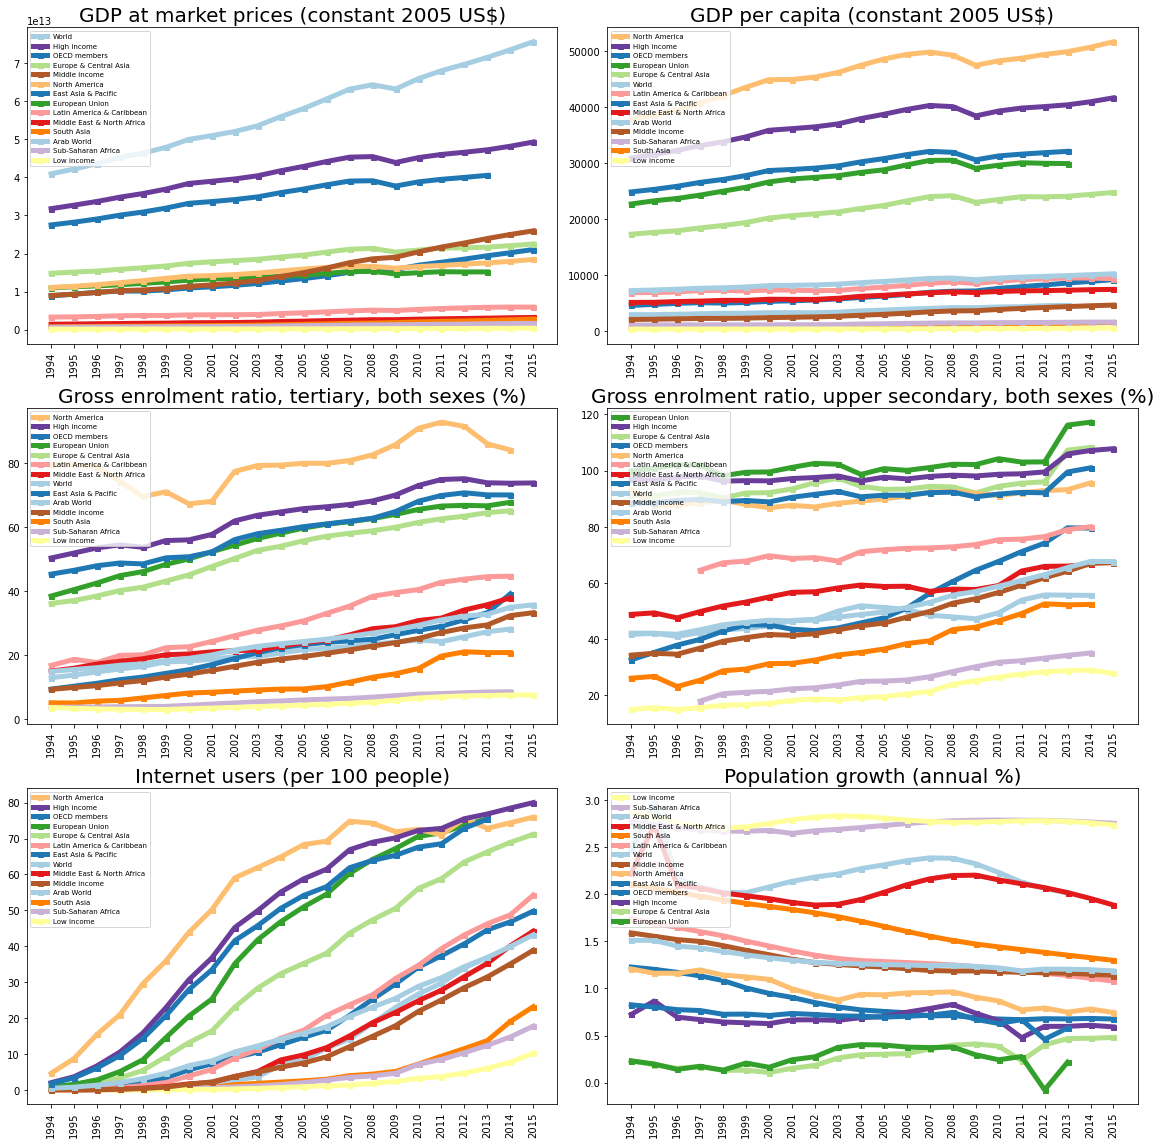

In [25]:
region_trends(data_v5)

* It can be seen that on 4 of the 6 indicators considered, namely the Internet access rate, the enrolment rates in upper secondary and tertiary education, as well as the GDP per capita, the European Union is always present in the top trio


* On the 4 indicators considered, North America is also in the top trio. It is not surprising to find the same regions in these positions since we have seen that these indicators are positively correlated. 


* On the other hand, the European Union and North America are at the bottom of the pack in terms of population growth. The region with the fastest population growth is Sub-Saharan Africa.   



## Filters

### Key indicators : GDP, internet, pop growth

* For the rest of this analysis, we will focus on the following three indicators: 
    * GDP, 
    * Internet access rate
    * and population growth


* Indeed, the analysis of the correlation of the indicators has shown us that these three indicators are not correlated with each other and that they therefore each provide a share of non-redundant information

In [26]:
### Function that represents as bars the value on each indicator accross years for given regions 

def colored_bars(data):

# Réalisation d'un graphique en barres par indicateur

    
    data = data.copy()
    
    
    ### Define variables : one plot per indicator
    indicators = ['GDP at market prices (constant 2005 US$)',
                  'Internet users (per 100 people)', 'Population growth (annual %)']
    
    ### year columns that contain indicator values to plot
    years = data.columns[4:]
    
    ### manually identified region labels on 'Country Name' variable
    regions = ['Arab World', 'East Asia & Pacific', 'Europe & Central Asia',
          'European Union', 'Latin America & Caribbean', 'Middle East & North Africa', 'North America',
          'South Asia', 'Sub-Saharan Africa', 'High income', 'Low income',
           'Middle income', 'World', 'OECD members']


    data.set_index(['Indicator Name', 'Country Name'], inplace = True)
    
    
    fig = plt.figure(figsize = (16,12))
    palette = sns.color_palette(palette = "Paired", n_colors = len(regions))


    for i, indicator in enumerate(indicators):
        ax = fig.add_subplot(2,2,i+1)
        
        ### Mean value accross years on current indicator for each region
        values = [data.loc[(indicator,region),years].mean() for region in regions]
        ax.bar(x = np.linspace(0,1,len(regions)), 
                     height = sorted(values),
                     width = 0.05, align = 'center', 
               color = list(map(lambda i : palette[i],sorted(range(len(values)), key = lambda k : values[k]))))


        ax.set_title(indicator, fontdict={'fontsize': 16, 'fontweight': 'medium'}, 
                pad = 16)
        
        ax.set_xticks(np.linspace(0,1,len(regions)))
        ax.set_xticklabels(labels = map(lambda i : regions[i], sorted(range(len(values)), 
                                              key = lambda k : values[k])), 
                rotation = 90, fontsize = 12)

        ax.set_ylabel('Mean over 1994-2015', fontsize=12)
        
    fig.tight_layout()


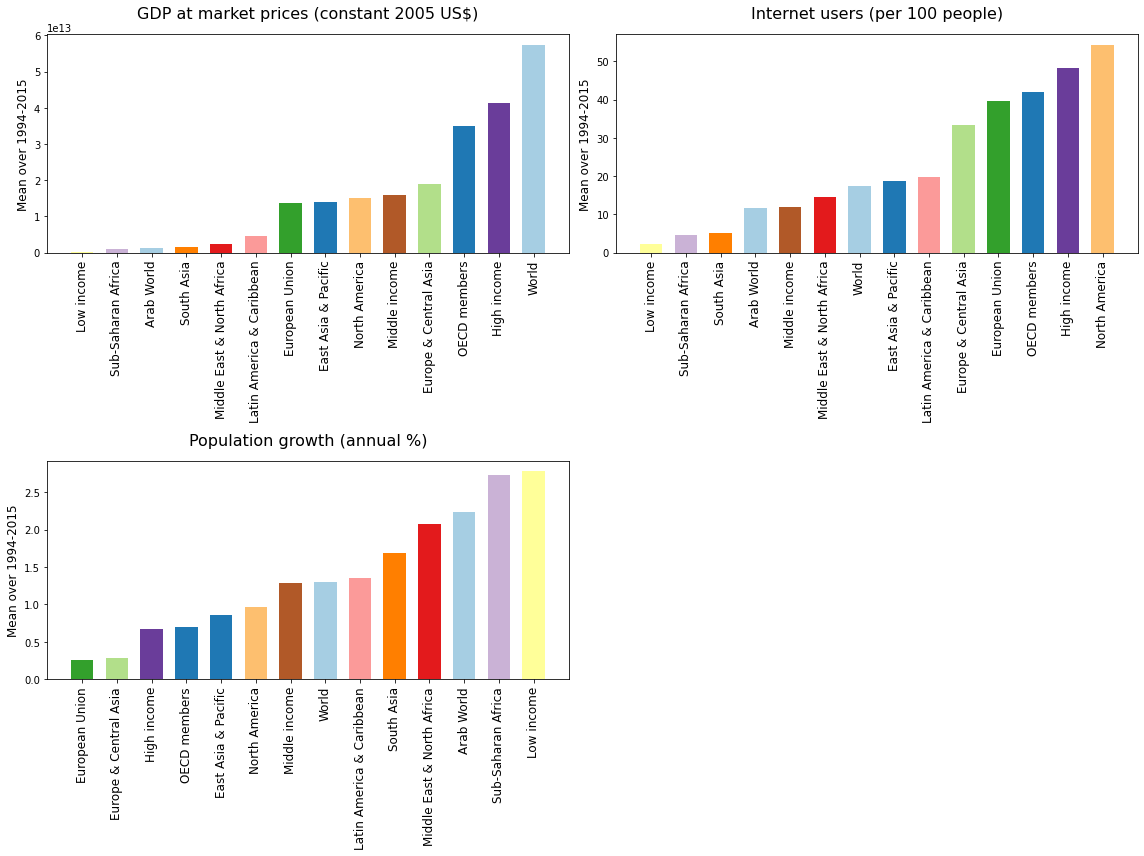

In [27]:
colored_bars(data_v5)

In [28]:
def boxplots(data):
    
    data = data.copy()
    
    data = pd.melt(data, id_vars = ['Indicator Name', 'Country Name'], 
            value_vars = data.columns[4:], var_name = 'Year', 
                value_name = 'Indicator Value')
    
    
    indicators = ['GDP at market prices (constant 2005 US$)',
                  'Internet users (per 100 people)', 'Population growth (annual %)']
    
    regions = ['Arab World', 'East Asia & Pacific', 'Europe & Central Asia',
          'European Union', 'Latin America & Caribbean', 'Middle East & North Africa', 'North America',
          'South Asia', 'Sub-Saharan Africa', 'High income', 'Low income',
           'Middle income', 'World', 'OECD members']
    
    ### Filter data on regions
    data = data[data['Country Name'].isin(regions)]
    
    fig = plt.figure(figsize = (16,12))
    
    for i, indicator in enumerate(indicators):
        data_ = data[data['Indicator Name'] == indicator]
        g = fig.add_subplot(2,2,i+1)
        g = sns.boxplot(x = 'Country Name', y = 'Indicator Value', data = data_)
        plt.xticks(fontsize = 10,rotation = 90)
        g.set_title(indicator, fontsize = 16)
        
    fig.tight_layout()

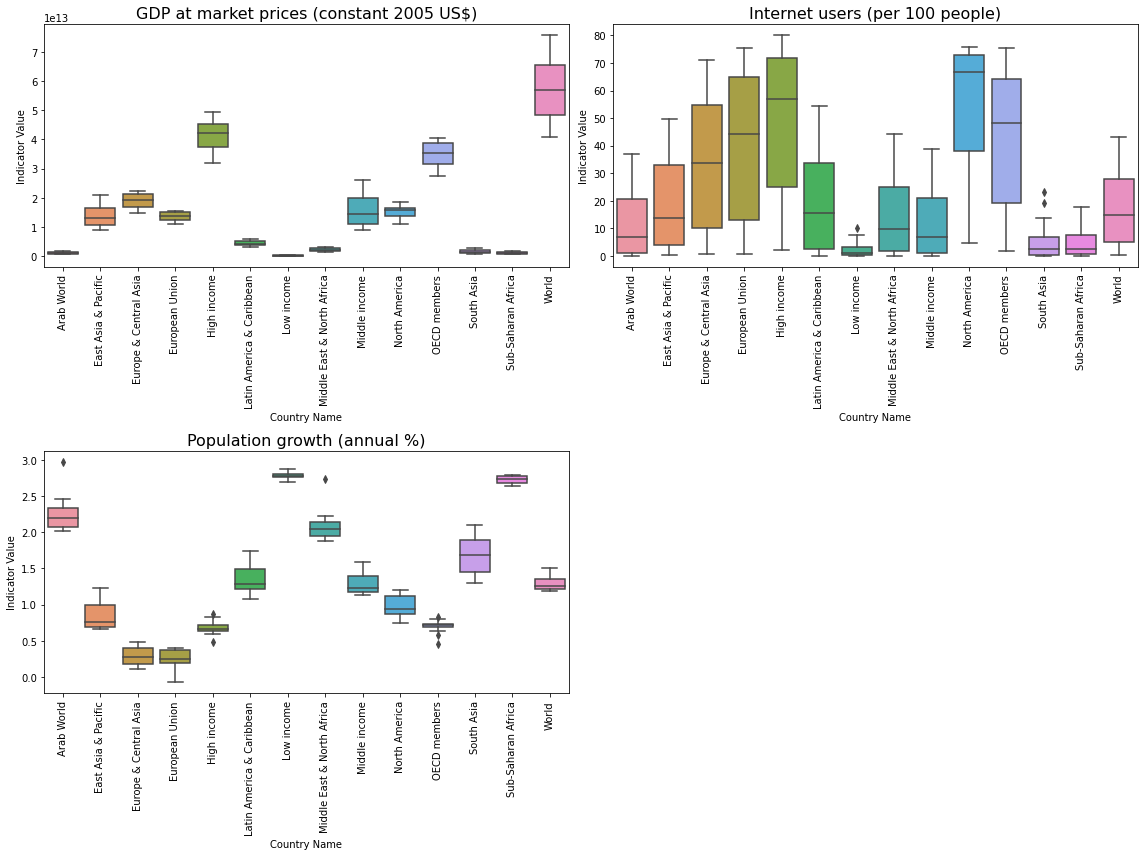

In [29]:
boxplots(data_v5)

* The graphs above shows the average by major region and by indicator over the 1994-2015 period

* They confirm the insight on regions hierarchy on each indicator

### Key regions : Europe, Asia, North America

* These graphs showed us that three major regions stood out, particularly in terms of GDP and Internet access indicators: Europe, North America and East Asia & Pacific. 



* We will continue a country-by-country analysis within each of these regions in order to identify the most attractive countries


* We will also filter the three indicators that we will retain in the rest of this analysis.

In [30]:
# Recovery of the column 'country code', primary key of the file 'country_data' of the dataset.
country_data_path =  "Data/EdStatsCountry.csv"
country_data = pd.read_csv(country_data_path)

In [31]:
#### Function that merges main table with region dataframe, filters regions & indicators of interest

def filter_function(data, indicators, regions):
    
    data = data.copy()
    
    ### Merging 'region' column to main dataframe so we can filter according to selected regions
    data = data.merge(country_data[['Country Code', 'Region']], how = 'left', 
                    on = 'Country Code')
    
    ### Filters on selected regions
    data = data[data['Region'].isin(regions)]

    #### Filters on selected indicators
    data = data[data['Indicator Name'].isin(indicators)]
    
    
    return data

In [32]:
### Key indicators
indicators = ['GDP at market prices (constant 2005 US$)',
     
              'Internet users (per 100 people)', 'Population growth (annual %)']
### Key regions
regions = ['East Asia & Pacific', 'North America', 'Europe & Central Asia']

data_v6 = filter_function(data_v5, indicators, regions)
data_v6.shape

(288, 27)

### Missing value analysis : countries to delete


<AxesSubplot:>

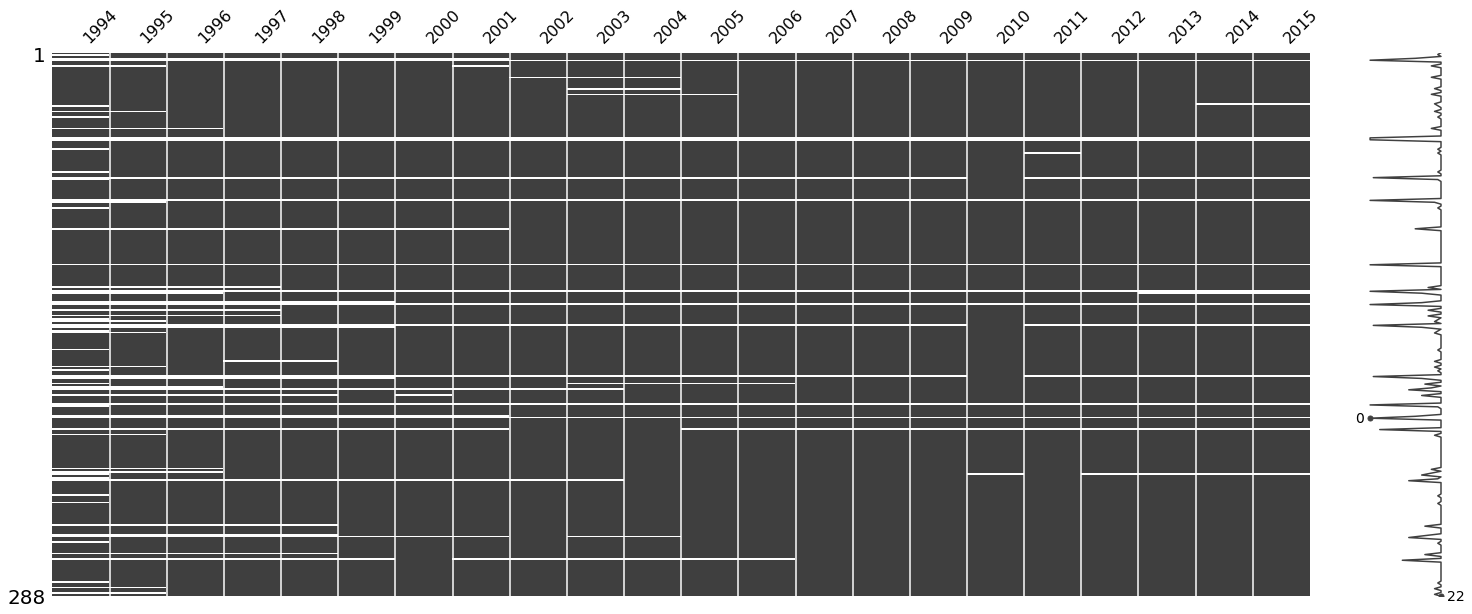

In [33]:
import missingno as msno

year_cols = data_v6.columns[data_v6.dtypes == 'float64']
msno.matrix(data_v6[year_cols])

* Some countries have lots of missing values accross years
* We should delete them so we can compare the countries accross all indicators

In [34]:
def missing_lines_filtering(data, threshold):
    
    data = data.copy()
    year_cols = data.columns[4:-1]
    
    ### The mask identifies rows with less than (1-threshold) of NANs 
    mask = data[year_cols].notnull().mean(axis = 1) >= threshold
    
    #### We identify and delete all rows for countries identified by the mask
    countries_to_delete = data['Country Name'][~mask].unique()
    mask = data['Country Name'].isin(countries_to_delete)
    
    ### Delete countries
    data = data[~mask]
    
    
    return data

<AxesSubplot:>

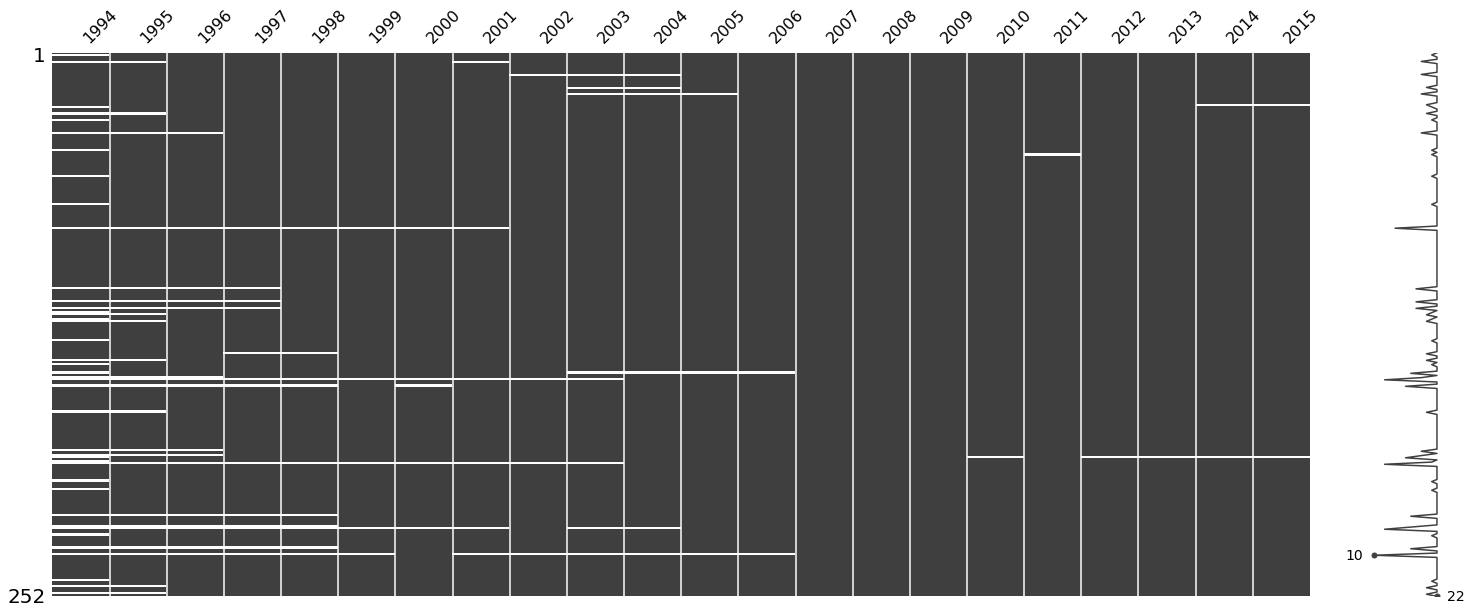

In [35]:
# Delete rows that have more than 60% of Nan values
data_v7 = missing_lines_filtering(data_v6, 0.4)

year_cols = data_v7.columns[data_v7.dtypes == 'float64']
msno.matrix(data_v7[year_cols])

The data is better fulfilled after deleting deficient lines

## Countries ranking per indicator



The following graph ranks the countries by region and by indicator accross years


In [36]:
def countries_ranking(data, indicator, region):
    
    data = data.copy()
    
    data.set_index(['Indicator Name', 'Region'], inplace = True)
    
    ### Filter on indicator & region
    data = data.loc[(indicator, region),:]
    
    
    fig = plt.figure(figsize = (6,7))
    ax = fig.add_subplot(111)
    
    ### Plot horizontal bars where each bar value is mean accross years for each country
    ax.barh(y = np.linspace(0,1, len(data)),
            
    width = sorted(data.mean(axis=1)),
    align = 'center', height = 0.015)
    
    
    
    ax.set_yticks(np.linspace(0,1, len(data)))
    
    ### Sort country labels
    labels, _ = zip(*sorted(zip(data['Country Name'], data.mean(axis = 1)), 
                      key = lambda k : k[1]))
    ax.set_yticklabels(labels, fontsize = 8)
    
    
    ax.set_title(indicator + ' ' + region, fontdict={'fontsize': 12, 'fontweight': 'medium'},
                pad = 12)
    ax.set_xlabel('Mean value (1994-2015)', fontsize = 12)
    ax.set_xlim((0,data.loc[(indicator, region),].mean(axis=1).sort_values().max()*1.05))
    plt.xticks(fontsize = 10)
    plt.subplots_adjust(hspace = 0.1) 

    fig.tight_layout()    

/home/marco/anaconda3/envs/education/lib/python3.8/site-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


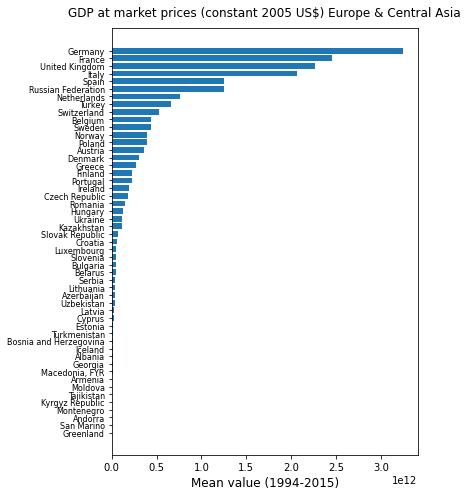

In [50]:
countries_ranking(data_v7, indicators[0], regions[2])

## Defining a score

In order to compare countries on a common basis, we will assign a score to each country in each region based on its performance on each of the indicators.


* We set the following weighting: 

    * 4 for GDP: we believe that GDP is the overriding criterion: the more a country generates revenues, the more wealth it distributes to its inhabitants and the more potential customers for our company increases. 
    
    * 2 for Internet access rate : But sometimes GDP is explained by a 'population' effect, and the wealth per capita remains modest. However, we have seen that the Internet access rate was positively correlated to the GDP per capita, so we attribute a coefficient of 2 to it.
    
    * 1 for population growth : Finally, a positive population growth rate will mean, all other things being equal, that the number of potential customers for our company will remain at least stable. 







* The following graph shows the ranking of the countries selected on the basis of this score. 
The values have been normalized so that they can be added together. 

In [38]:
from sklearn.preprocessing import StandardScaler

def countries_scoring(data, region):
    
    data = data.copy()
    
    
    ### Filtering on selected region
    data = data[data['Region'] == region]
    
    
    ### Reduce year columns to a single column named 'Year'
    data = pd.melt(data, id_vars = ['Country Name', 'Indicator Name', 'Region'], 
    value_vars = data.columns[data.dtypes == 'float64'], var_name = 'Year', value_name  = 'Indicator Value')
    
    
    ### Set indicators as columns, each row represents mean value accross years on each indicator
    data = data.pivot_table(values = 'Indicator Value', index = 'Country Name', 
        columns = 'Indicator Name')
    
    
    ### setting indicators to the same scale
    scaler = StandardScaler()
    data[data.columns] = scaler.fit_transform(data)
    
    ### dictionary with weights for each indicator to compute the score for each country
    var_weights = {'GDP at market prices (constant 2005 US$)' : 4, 
            'Internet users (per 100 people)' : 2, 
    'Population growth (annual %)' : 1}
    
    
    ### Plotting
    fig = plt.figure(figsize = (7,6))
    ax = fig.add_subplot(111)
    
    ax.barh(y = np.linspace(0,1, len(data)),
           
    width = sorted(np.add.reduce([var_weights[indicator]*data[indicator] 
        for indicator in data.columns])), 
    height = .01)
    
    #### Sort country labels
    labels, _ = zip(*sorted(zip(data.index, np.add.reduce([var_weights[indicator]*data[indicator] 
        for indicator in data.columns])), key = lambda k : k[1]))
    
    ax.set_yticks(np.linspace(0,1, len(data)))
    ax.set_yticklabels(labels, fontsize = 7)
    ax.set_title(region +' ranking')

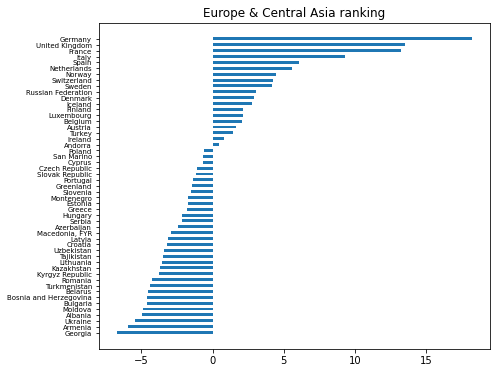

In [39]:
countries_scoring(data_v7, regions[2])

## Best countries accross regions

The countries with the highest scores in each of the three major regions are : 
* in Europe: 
    * Germany, the United Kingdom, Switzerland, Norway, the Netherlands, Italy and Spain
* in Asia & Pacific: 
    * Japan, China, South Korea, Singapore, Australia and New Zealand
* in North America: 
    * the United States, Canada and the United States of America.

We will now assess the trend of each of these countries on the three indicators in order to make a final selection. 


In [40]:
def best_countries_trends(data, indicator, countries):
    

    data = data.copy()
    
    ### Filter on indicator and countries
    
    data.set_index(['Indicator Name', 'Country Name'], inplace = True)
    data = data.loc[(indicator, countries),:]
    
    #### Define year columns that contain values to plot
    years = data.columns[data.dtypes == 'float64']
    
    
    palette = sns.color_palette(palette = "Paired", n_colors = len(countries))
    fig = plt.figure(figsize = (16,9))
    ax = fig.add_subplot(111)
    
    
    for j, country in enumerate(countries):
        ax.plot(data.loc[(indicator, country),years],  
                     linestyle = 'solid', 
                    linewidth = 4,color = palette[j], label = 
                         countries[j], alpha = 0.8) 

    ax.set_title(indicator, fontdict={'fontsize': 20, 'fontweight': 'medium'})
     
    plt.xticks(rotation = 90, fontsize = 12)
    plt.yticks(fontsize = 12)
    
    handles, labels  = ax.get_legend_handles_labels()
    
    ### 2015 values for each country of the list on current indicator
    values = [data.loc[(indicator, country), '2015'] for country in countries]
    
    #### Sort labels according to indicator value in 2015
    handles, labels, _  = zip(*sorted(zip(handles, labels,values), 
            key = lambda k : k[2], reverse = True))
    
    ax.legend(handles, labels, loc = 'best', fontsize = 10)


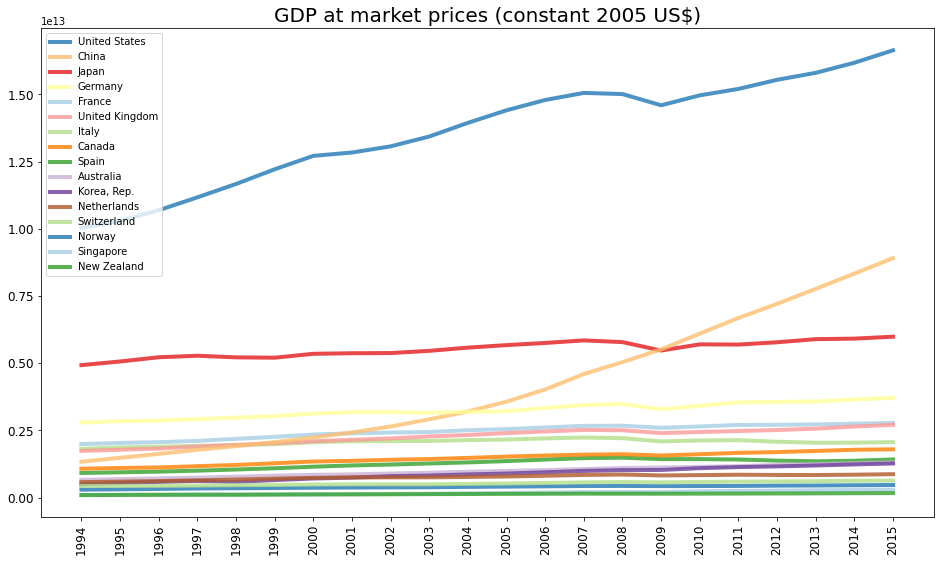

In [51]:
countries = ['France', 'United States', 'Italy', 
                      'Spain', 'United Kingdom', 'Japan', 'China', 
                      'Canada', 'Australia', 'Korea, Rep.', 'Germany', 'Netherlands', 'Singapore', 
                      'Norway', 'Switzerland', 'New Zealand']


best_countries_trends(data_v7, indicators[0], countries)

## Final ranking on score

In the same way as above, we will establish a score that takes into account the performance of countries on each of the indicators during the period 1994-2015. Then we will visualize the final ranking.

* The weighting remains the same as above:
  * 4 points for GDP
  * 2 points for the Internet access rate 
  * 1 point for population growth. 

In [42]:
def selected_countries_scoring(data, countries):
    
    data = data.copy()
    
    
    ### Filtering on selected region
    data = data[data['Country Name'].isin(countries)]
    
    
    ### Reduce year columns to a single column named 'Year'
    data = pd.melt(data, id_vars = ['Country Name', 'Indicator Name'], 
    value_vars = data.columns[data.dtypes == 'float64'], 
        var_name = 'Year', value_name  = 'Indicator Value')
    
    
    ### Set indicators unique labels as columns
    ### each row represents mean value accross years on each indicator
    data = data.pivot_table(values = 'Indicator Value', index = 'Country Name', 
        columns = 'Indicator Name', aggfunc = 'mean')
    
    
    ### setting indicators to the same scale 
    scaler = StandardScaler()
    data[data.columns] = scaler.fit_transform(data)
    
    ### dictionary with weights for each indicator to compute the score for each country
    var_weights = {'GDP at market prices (constant 2005 US$)' : 4, 
            'Internet users (per 100 people)' : 2, 
    'Population growth (annual %)' : 1}
    

    ### Plotting
    fig = plt.figure(figsize = (7,7))
    ax = fig.add_subplot(111)
    
    ### Sorted bars
    ax.barh(y = np.linspace(0,1,len(data)),
           
    width = sorted(np.add.reduce([var_weights[indicator]*data[indicator] 
        for indicator in data.columns])), 
    height = .05)
    
    #### Sort country labels by score
    labels, _ = zip(*sorted(zip(data.index, np.add.reduce([var_weights[indicator]*data[indicator] 
        for indicator in data.columns])), key = lambda k : k[1]))
    
    ax.set_yticks(np.linspace(0,1,len(data)))
    ax.set_yticklabels(labels, fontsize = 10)
    ax.set_title('countries ranking', fontsize = 16)

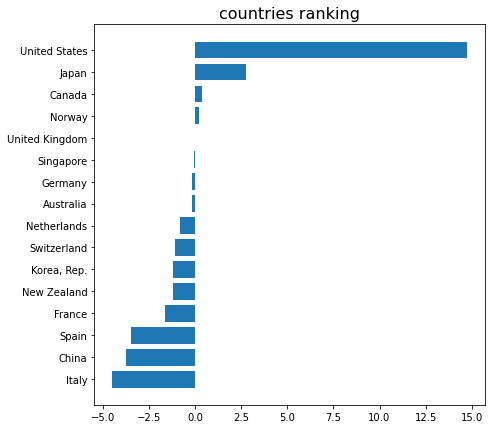

In [43]:
selected_countries_scoring(data_v7, countries)

# Conclusion

* The final ranking recognizes the United States, Japan, Canada and Norwa as the most performing on our three indicators in the last two decades


* An area of improvement could be to give a higher weight to most recent indicator values 


* The main goal of this project was to compare countries by producing the best visualizations possible to find insights and make relevant business decisions